# Group members
- Bui Huy Giap - 23127289
- Le Minh Duc - 23127351
- Vu Tien Dung - 23127354
- Dinh Xuan Khuong - 23127398
- Nguyen Dong Thanh - 23127538

# 0. Import our libraries

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# 1. Import data


Data source: https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction

In [231]:
# code here
data_path = "data/medical_insurance.csv"
try:
    df = pd.read_csv(data_path)
    display(df.head())
except FileNotFoundError:
    print("Error: File not found")
except Exception as e:
    print(f"An error occurred: {e}")

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Helper Functions


In [232]:
def hist_plot(feature, title: str, color: str, x_label: str = None, y_label : str = None):
    # Histograms for numerical variables
    # plt.figure(figsize=(4,5))
    plt.hist(feature, color=color, edgecolor= 'black')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

def bar_plot(feature, title: str, color: str):
    # Bar plots for categorical variables
    # plt.figure(figsize=(4,5))
    feature.value_counts().plot(kind = 'bar', color=color)
    plt.title(title)
    plt.show()

def compare_output(y_pred, y_true):
    plt.figure(figsize=(20,8))
    plt.plot(y_pred, c='orange', label='Predicted Charges')
    plt.plot(y_true, c='blue', label='True Charges')
    plt.xlabel("Index")
    plt.ylabel("Charges")
    plt.legend(loc='best')  # automatically chooses the best place
    plt.title("Comparison of Predicted vs True Charges")
    plt.show()




# 3. Exploratory Data Analysis (EDA)
- How many rows and how many columns?  
- What is the meaning of each row?  
- Are there **<span style="color:red">duplicated rows</span>**?  
- What is the meaning of each column?  
- What is the current data type of each column? Are there columns having **<span style="color:red">inappropriate data types</span>**?  
- With each numerical column, how are values distributed?  
  - What is the percentage of **<span style="color:red">missing values</span>**?  
  - Min? max? Are they **<span style="color:red">abnormal</span>**?  
- With each categorical column, how are values distributed?  
  - What is the percentage of **<span style="color:red">missing values</span>**?  
  - How many different values? Show a few  
  - Are they **<span style="color:red">abnormal</span>**?

In [233]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


There are 2772 rows and 7 columns in total.

In [235]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [236]:
list(set(df['region']))

['northeast', 'northwest', 'southeast', 'southwest']

In [237]:
list(set(df['smoker']))

['no', 'yes']

In [238]:
list(set(df['sex']))

['male', 'female']

### Meaning of each column

| Column       | Meaning                                                                                                                                 |
| ------------ | --------------------------------------------------------------------------------------------------------------------------------------- |
| **age**      | Age of the individual (in years).                                 |
| **sex**      | Gender of the individual (male or female). |
| **bmi**      | Body Mass Index of the individual (a measure of body fat based on height/weight).                         |
| **children** | Number of children/dependents the individual has.                                                                  |
| **smoker**   | Whether the individual is a smoker (“yes” if they smoke, “no” if they don’t).                                     |
| **region**   | The geographic region where the individual lives (e.g., northeast, northwest, southeast, southwest in the US context).  |
| **charges**  | The medical insurance cost or charges for the individual (target variable in the dataset).                   |



## Duplicate checking

In [239]:
df.duplicated().sum()

np.int64(1435)

In [240]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [241]:
dups = df[df.duplicated(keep=False)]
dups


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


Some columns that are duplicated

In [242]:
dups.groupby(df.columns.tolist()).size()

age  sex     bmi     children  smoker  region     charges    
18   female  20.790  0         no      southeast  1607.51010     2
             21.660  0         yes     northeast  14283.45940    2
             24.090  1         no      southeast  2201.09710     2
             25.080  0         no      northeast  2196.47320     2
             26.315  0         no      northeast  2198.18985     2
                                                                ..
64   male    36.960  2         yes     southeast  49577.66240    4
             37.905  0         no      northwest  14210.53595    2
             38.190  0         no      northeast  14410.93210    2
             39.160  1         no      southeast  14418.28040    2
             40.480  0         no      southeast  13831.11520    2
Length: 1337, dtype: int64

## 3.1 Data Cleaning 

### 3.1.1 Missing values

#### a. Delete missing values

In [243]:
df.isnull().sum() # Don't have missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### b. Noise reduction

#### c. Resolve conflicting data

#### d. Delete duplicate values 

In [244]:
df = df.drop_duplicates().reset_index(drop=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


#### 

## 3.2 Distribution of each feature

In [245]:
categorical_cols = ["sex", "children", "smoker", "region"]
continuous_cols = [name for name in df.columns.to_list() if name not in  categorical_cols]
continuous_cols, categorical_cols


(['age', 'bmi', 'charges'], ['sex', 'children', 'smoker', 'region'])

### Categorical columns

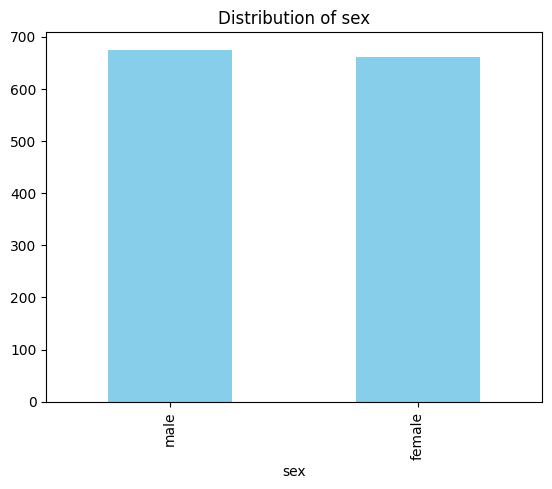

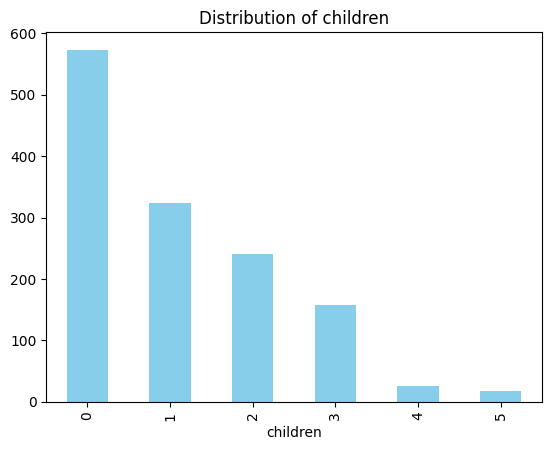

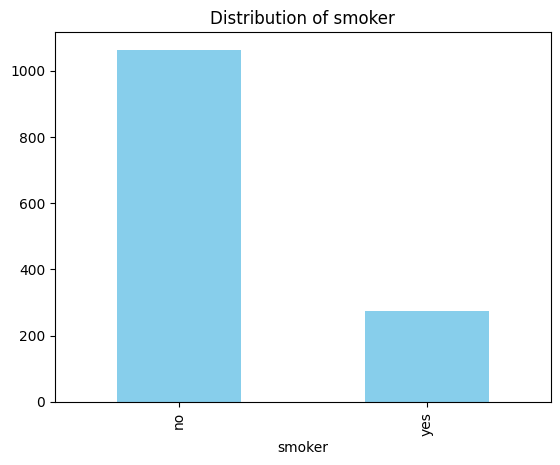

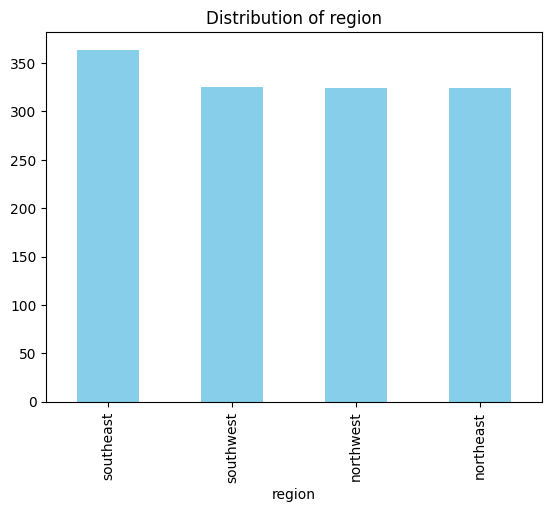

In [246]:
for name in categorical_cols:
    bar_plot(df[name], f"Distribution of {name}", "skyblue")

### Continuous columns

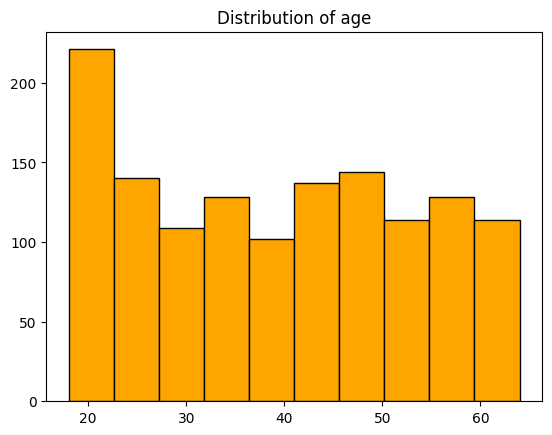

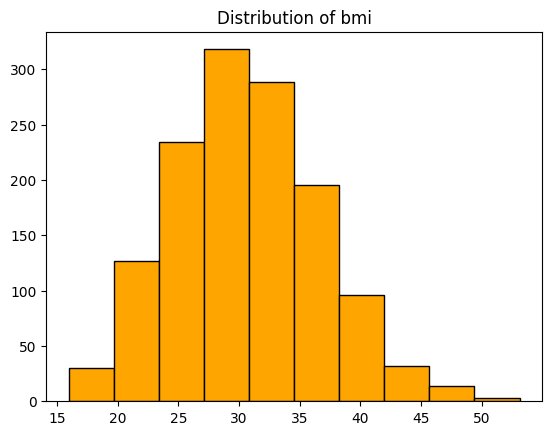

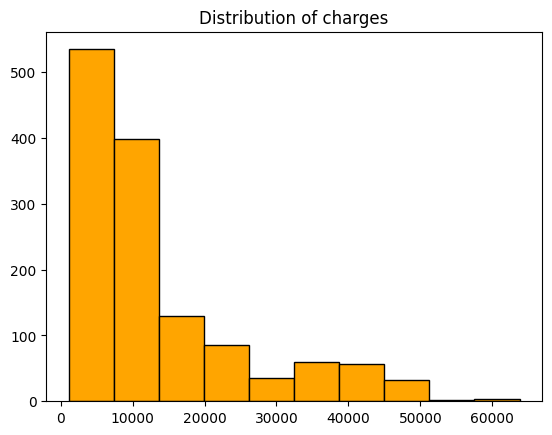

In [247]:
for name in continuous_cols:
    hist_plot(df[name], f"Distribution of {name}", "orange")

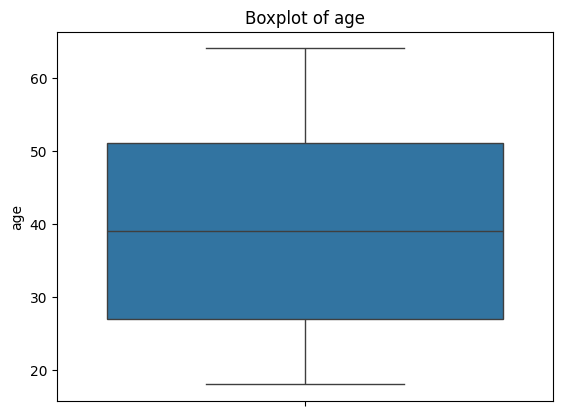

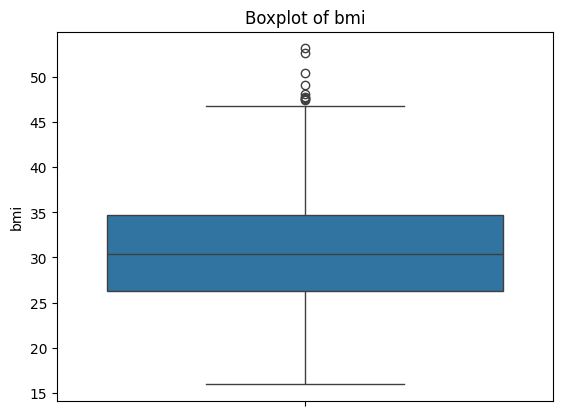

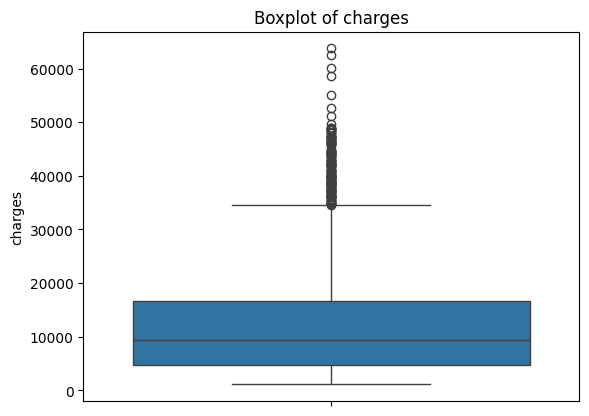

In [248]:
for name in continuous_cols:
    sns.boxplot(df[name])
    plt.title(f"Boxplot of {name}")
    plt.show()

## 3.3 Data Pre-Processing   

### 3.3.1 One-hot Encoding

In [249]:
def encode_categorical(data):
    data = data.copy()
    # Perform one-hot encoding
    one_hot_sex = pd.get_dummies(data['sex'], dtype=int, drop_first=True)
    one_hot_smoker = pd.get_dummies(data['smoker'], dtype=int, drop_first=True)
    one_hot_region = pd.get_dummies(data['region'], dtype=int, drop_first=False)

    # Concatenate the one-hot encoded columns with the original DataFrame
    df_encoded = pd.concat([data.iloc[:, :-1], one_hot_region, data.iloc[:, -1]], axis=1)
    df_encoded.drop(columns=['region'], inplace=True)
    df_encoded['sex'] = one_hot_sex
    df_encoded['smoker'] = one_hot_smoker

    return df_encoded

In [250]:
encode_df = encode_categorical(df)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


We can see that there is no null value in our dataframe

### 3.3.2 Feature scaling

## Relationship Checking

In [252]:
def scatter_mean(df, x_name: str, y_name: str):
    sns.scatterplot(x = x_name, y = y_name, data=df, alpha=0.6)

    mean_df = df.groupby(x_name, as_index=False)[y_name].mean()

    sns.lineplot(x = x_name, y = y_name, data=mean_df, color="red", linewidth=2)

    plt.title(f"Scatter plot of {x_name} and {y_name} with mean line")
    plt.show()

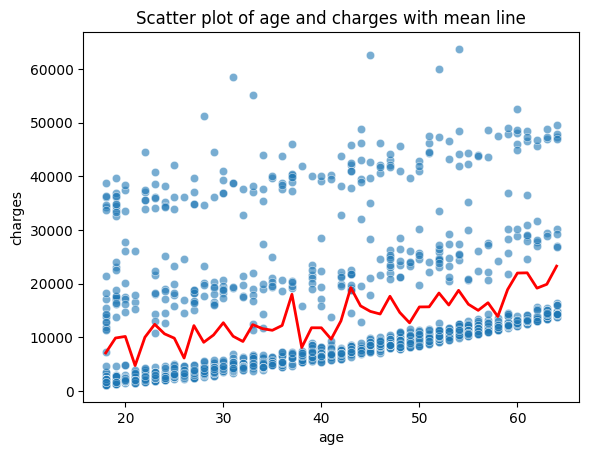

In [253]:
scatter_mean(df, "age", "charges")

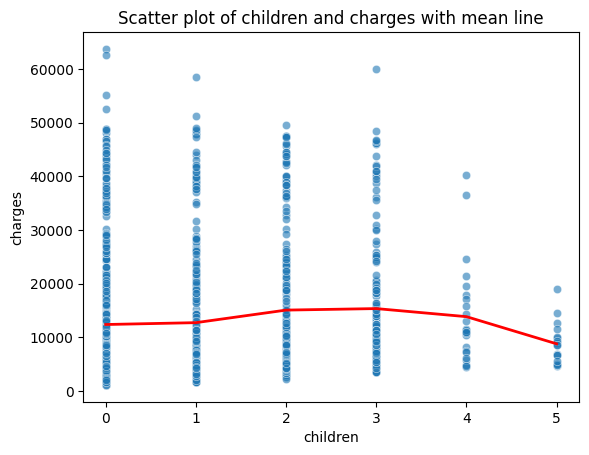

In [254]:
scatter_mean(df, "children", "charges")

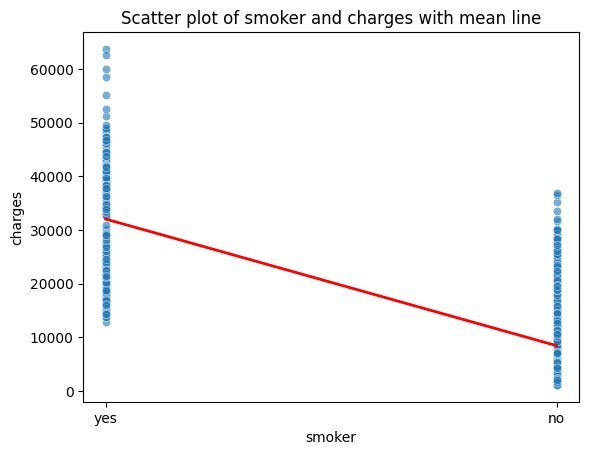

In [255]:
scatter_mean(df, "smoker", "charges")

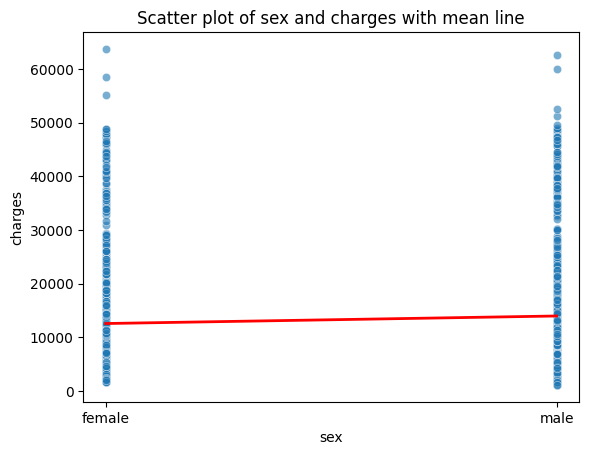

In [256]:
scatter_mean(df, "sex", "charges")

In [257]:
column_names = df.columns.to_list()
column_names

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [258]:
def scatter_mean_regression(df, x_name, y_name, bins=10):
    df_copy = df.copy()

    df_copy["x_bin"] = pd.cut(df_copy[x_name], bins=bins)

    mean_df = df_copy.groupby("x_bin", observed=True, as_index=False)[y_name].mean()

    mean_df["x_center"] = mean_df["x_bin"].apply(lambda x: x.mid)

    sns.scatterplot(x=x_name, y=y_name, data=df_copy, alpha=0.4)
    sns.lineplot(x="x_center", y=y_name, data=mean_df, color="red", linewidth=2, marker="o")

    plt.title(f"Scatter plot of {x_name} and {y_name} with mean line")
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()


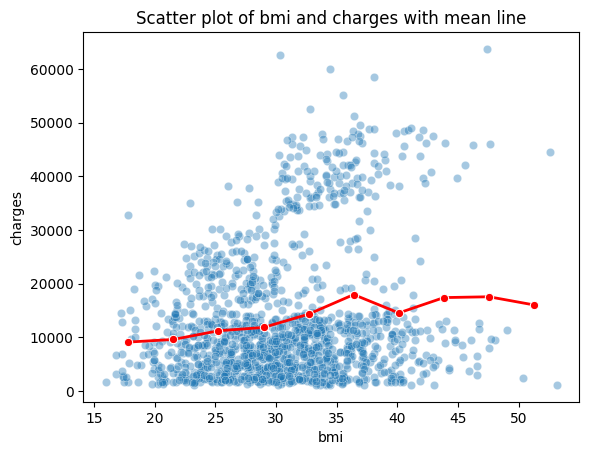

In [259]:
scatter_mean_regression(df, "bmi", "charges")

In [260]:
encode_df

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,19,0,27.900,0,1,0,0,0,1,16884.92400
1,18,1,33.770,1,0,0,0,1,0,1725.55230
2,28,1,33.000,3,0,0,0,1,0,4449.46200
3,33,1,22.705,0,0,0,1,0,0,21984.47061
4,32,1,28.880,0,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1332,50,1,30.970,3,0,0,1,0,0,10600.54830
1333,18,0,31.920,0,0,1,0,0,0,2205.98080
1334,18,0,36.850,0,0,0,0,1,0,1629.83350
1335,21,0,25.800,0,0,0,0,0,1,2007.94500


## Correlation Matrix

In [261]:
def plot_heatmap(df, columns=None, cmap='coolwarm', title='Correlation Matrix'):
    corr = df[columns].corr() if columns else df.corr()
    
    plt.figure(figsize=(10, 8))
    plt.imshow(corr, cmap=cmap, interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
    plt.yticks(range(len(corr.columns)), corr.columns)

    for i in range(len(corr.columns)):
        for j in range(len(corr.columns)):
            value = corr.iloc[i, j]
            plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')

    plt.title(title)
    plt.show()

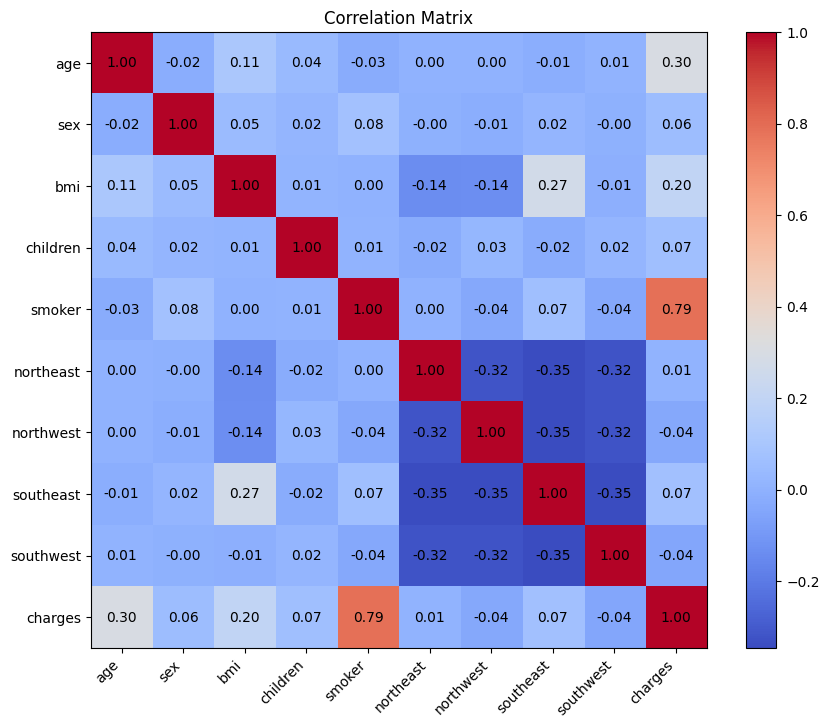

In [262]:
plot_heatmap(encode_df)

# 4. Building models


In [263]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures

In [264]:
X = encode_df.drop(["charges"],axis=1)
y = encode_df["charges"].reset_index(drop=True)
y = y.to_numpy()

#### Ideas
* Chia model theo features: 80|20 = train|test 
    * All features
    * smoker, bmi, age
    * smoker, bmi, age, children, sex
* Chia theo regularization: 70|15|15 = train|valid|test
    * Ridge regression
    * Lasso regression
    * Elastic




In [265]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val), len(X_test), len(y_test)

(962, 962, 107, 107, 268, 268)

#### Model 1: All features

In [266]:
X_train_numpy = X_train.to_numpy()
y_train_numpy = y_train

In [267]:
X_test_numpy, y_test_numpy = X_test.to_numpy(), y_test
X_valid_numpy, y_valid_numpy = X_val.to_numpy(), y_val

In [268]:
model_1 = LinearRegression() # Automatically add bias column
model_1.fit(X_train_numpy, y_train_numpy)
y_predicted = model_1.predict(X_test_numpy)

mse_all_features = mean_squared_error(y_test_numpy, y_predicted)
mae_all_features = mean_absolute_error(y_test_numpy, y_predicted)

print("MSE: ", mse_all_features)
print("MAE: ", mae_all_features)

MSE:  36023030.999959536
MAE:  4230.968508520282


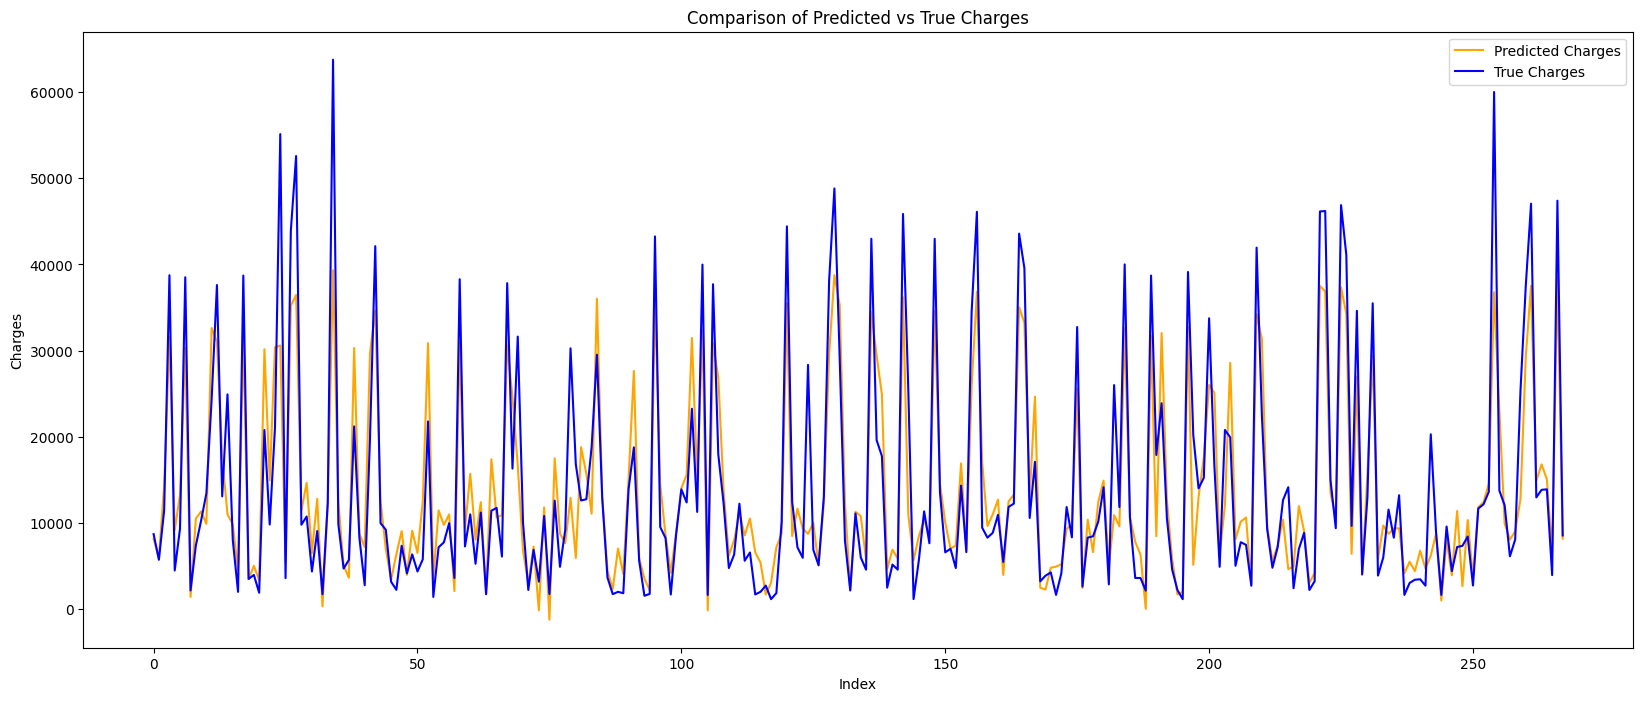

In [269]:
compare_output(y_predicted, y_test_numpy)

#### Model 2: smoker, age, bmi

In [270]:
X_train_smoke_age_bmi = X_train[["smoker", "age", "bmi"]].to_numpy()
X_test_smoke_age_bmi = X_test[["smoker", "age", "bmi"]].to_numpy()

In [271]:
model_2 = LinearRegression()
model_2.fit(X_train_smoke_age_bmi, y_train_numpy)
y_predicted = model_2.predict(X_test_smoke_age_bmi)

mse_3_features = mean_squared_error(y_test_numpy, y_predicted)
mae_3_features = mean_absolute_error(y_test_numpy, y_predicted)

print("MSE: ", mse_3_features)
print("MAE: ", mae_3_features)

MSE:  36206680.19737941
MAE:  4232.137423779902


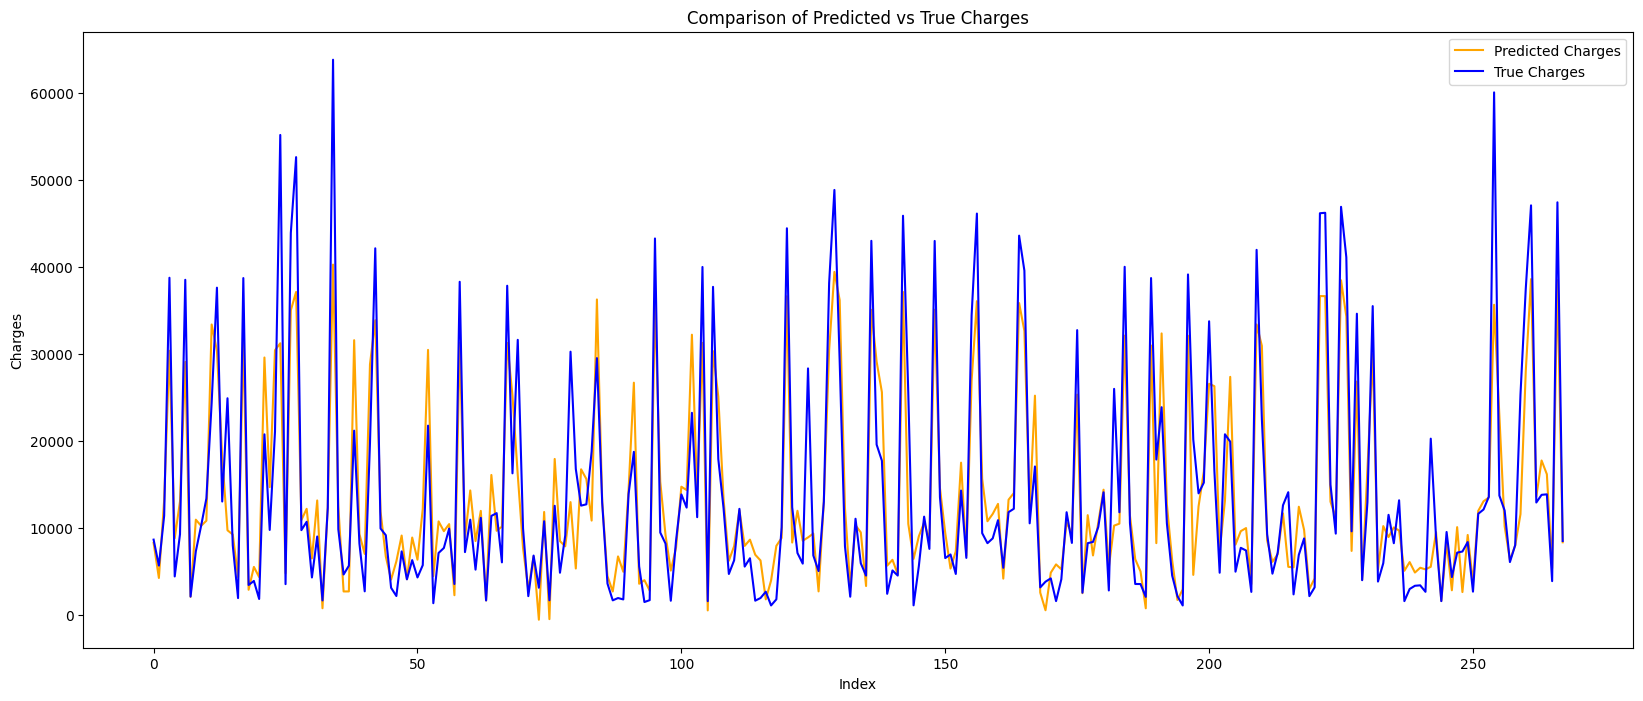

In [272]:
compare_output(y_predicted, y_test_numpy)

#### Model 3: smoker, age, bmi, children, sex

In [273]:
X_train_5_features = X_train[["smoker", "age", "bmi", 'children', 'sex']].to_numpy()
X_test_5_features = X_test[["smoker", "age", "bmi", 'children', 'sex']].to_numpy()

In [274]:
model_3 = LinearRegression()
model_3.fit(X_train_5_features, y_train_numpy)
y_predicted = model_3.predict(X_test_5_features)

mse_5_features = mean_squared_error(y_test_numpy, y_predicted)
mae_5_features = mean_absolute_error(y_test_numpy, y_predicted)

print("MSE:", mse_5_features)
print("MAE:", mae_5_features)

MSE: 36355463.10389177
MAE: 4247.019195373111


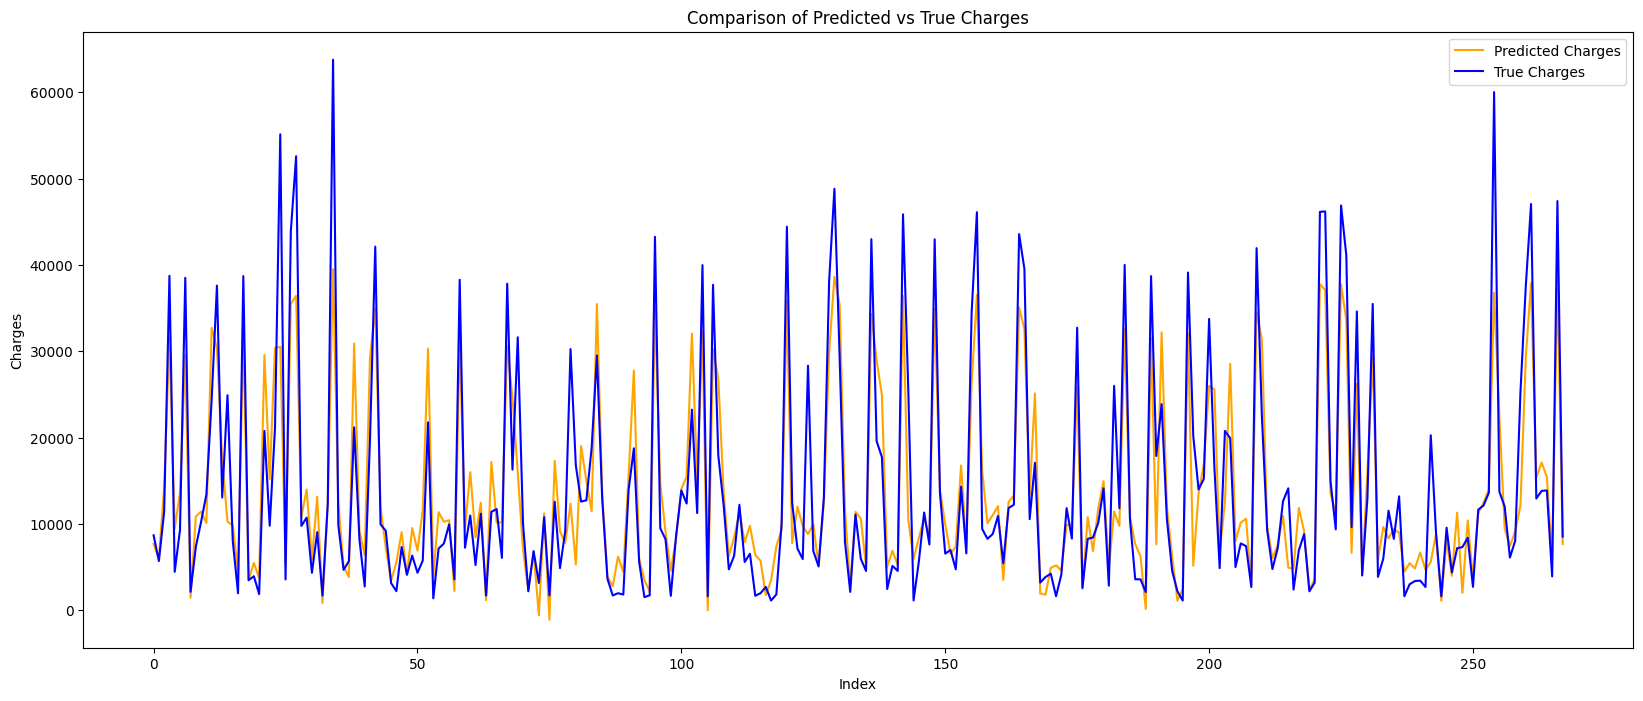

In [275]:
compare_output(y_predicted, y_test_numpy)

#### Model 4: Ridge regression 

In [276]:
# Preprocessing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numpy)
X_valid_scaled = scaler.transform(X_valid_numpy)
X_test_scaled  = scaler.transform(X_test_numpy)

X_trainval = np.concatenate([X_train_scaled, X_valid_scaled])
y_trainval = np.concatenate([y_train, y_valid_numpy])

In [277]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100] # lambda
param_grid = {'alpha': alphas} 

grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid,
                    cv=5, scoring='neg_mean_squared_error')
grid.fit(X_trainval, y_trainval)

best_alpha = grid.best_params_['alpha']
print("Best alpha:", best_alpha)

ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_trainval, y_trainval)

y_predicted = ridge_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test_numpy, y_predicted)
mae_ridge = mean_absolute_error(y_test_numpy, y_predicted)

print(mse_ridge)
print(mae_ridge)

Best alpha: 10
35826718.50304939
4202.594196432228


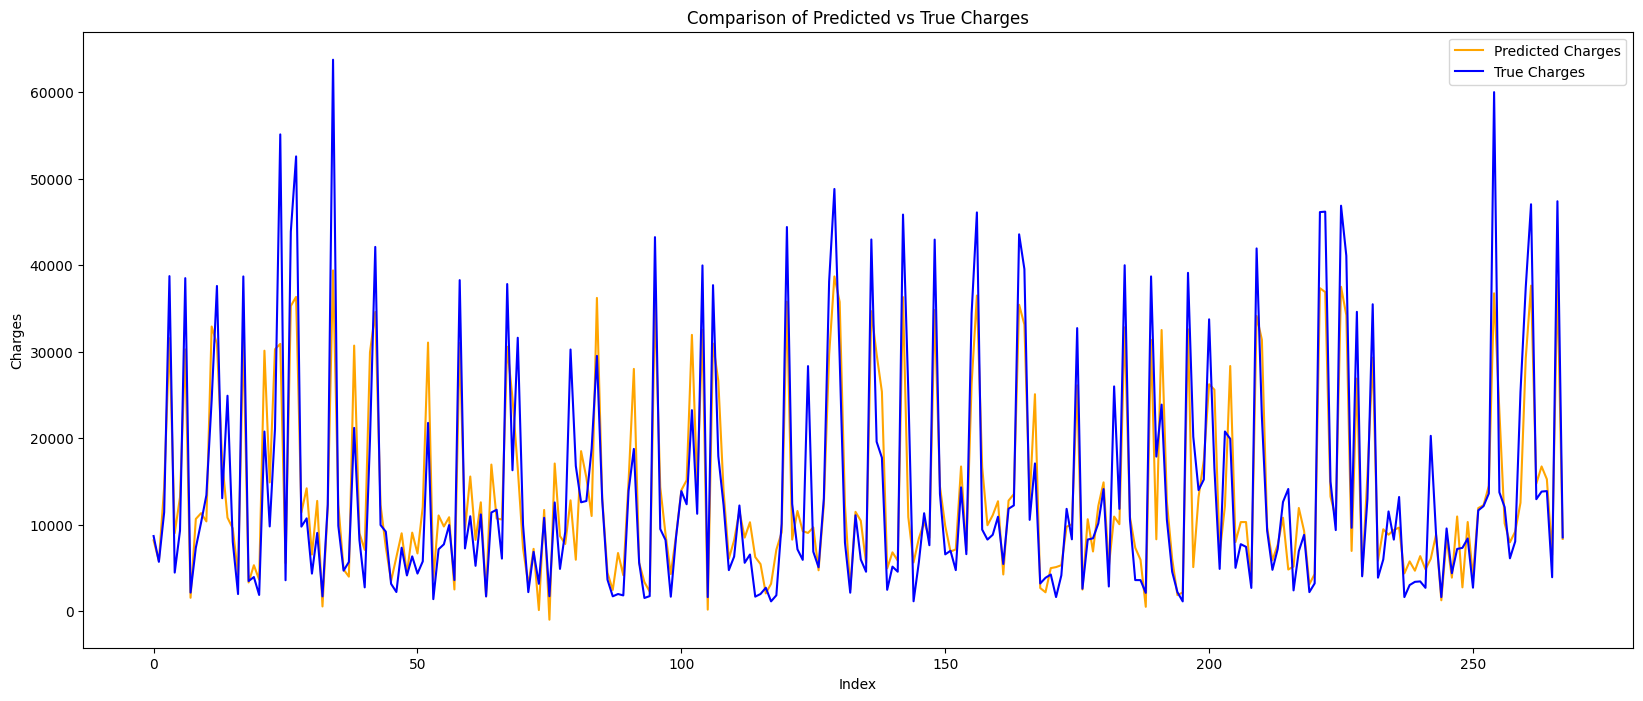

In [278]:
compare_output(y_pred=y_predicted, y_true=y_test_numpy)

#### Model 5: Lasso regression
* L1 norm
* Dùng Grid search để tìm hyperparameter lambda tối ưu nhất
* Trong Lasso có biến intercept (bias)

In [279]:
# Preprocessing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numpy)
X_valid_scaled = scaler.transform(X_valid_numpy)
X_test_scaled  = scaler.transform(X_test_numpy)

X_trainval = np.concatenate([X_train_scaled, X_valid_scaled])
y_trainval = np.concatenate([y_train, y_valid_numpy])


In [280]:

alphas = [0.001, 0.01, 0.1, 1, 10, 100] # lambda
param_grid = {'alpha': alphas} 

grid = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_trainval, y_trainval)

best_alpha = grid.best_params_['alpha']
print("Best lambda:", best_alpha)

lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_trainval, y_trainval)

y_predicted = lasso_model.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test_numpy, y_predicted)
mae_lasso = mean_absolute_error(y_test_numpy, y_predicted)

print(mse_lasso)
print(mae_lasso)

Best lambda: 100
36258685.488026485
4199.583871534138


c:\Users\Mario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.989e+08, tolerance: 1.158e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.452e+07, tolerance: 1.171e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

#### Model 6: Polynomial regression

In [281]:
# Preprocessing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numpy)
X_valid_scaled = scaler.transform(X_valid_numpy)
X_test_scaled  = scaler.transform(X_test_numpy)

X_trainval = np.concatenate([X_train_scaled, X_valid_scaled])
y_trainval = np.concatenate([y_train, y_valid_numpy])


In [282]:
poly = PolynomialFeatures(degree=2) # Mũ 2 ngon ăn 
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled) 

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_numpy)
y_predicted = model_poly.predict(X_test_poly)

mae = mean_absolute_error(y_test_numpy, y_predicted)
mse = mean_squared_error(y_test_numpy, y_predicted)

print("MAE: ", mae)
print("MSE: ", mse)

MAE:  2910.4314241990573
MSE:  21954573.137816053


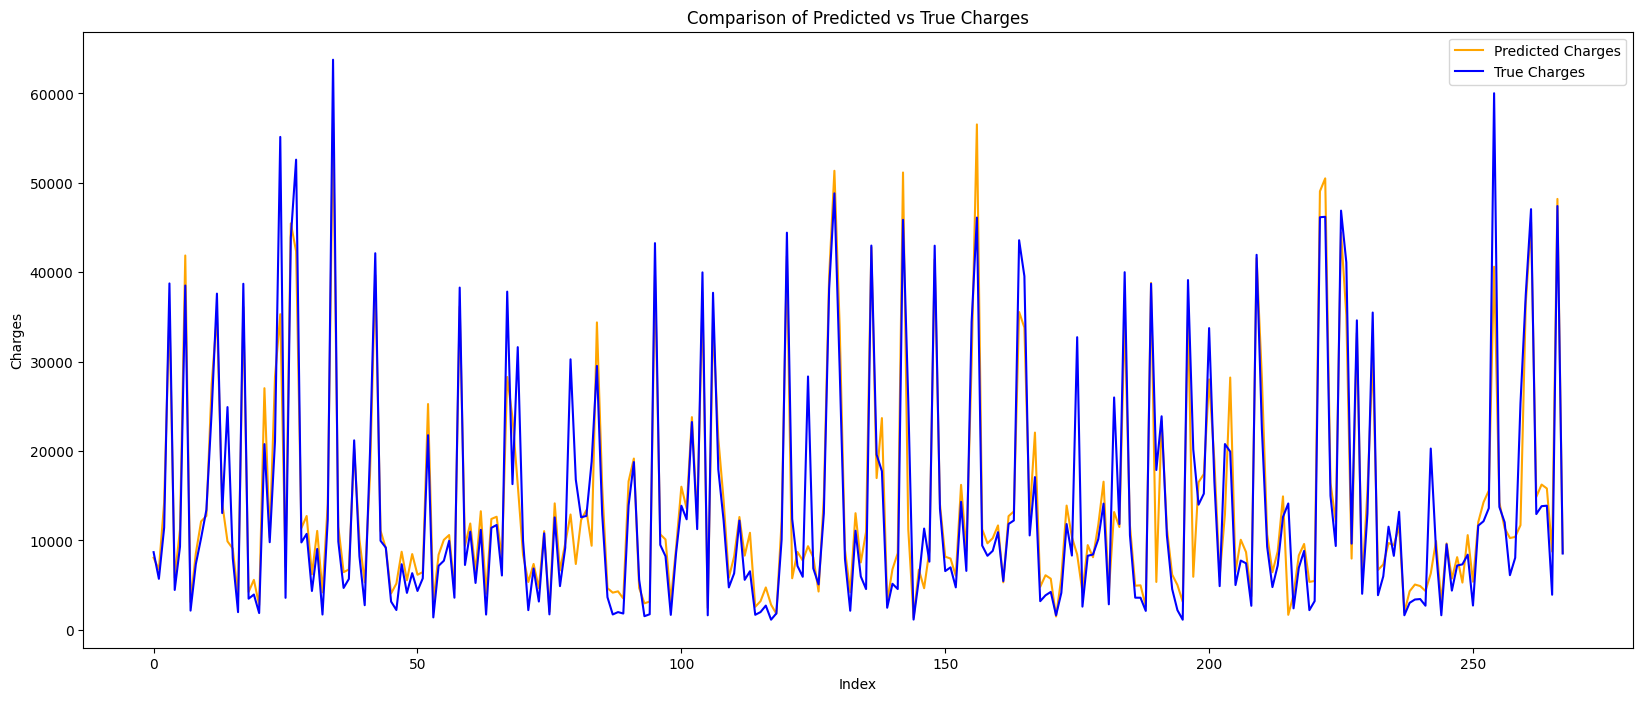

In [283]:
compare_output(y_pred=y_predicted, y_true=y_test_numpy)

#### Model 7: Mũ một feature

In [284]:
feature_name = 'bmi'
X_train_squared_feature = X_train
X_train_squared_feature[feature_name] **=2
X_train_squared_feature = X_train_squared_feature.to_numpy()

X_test_squared_feature = X_test
X_test_squared_feature[feature_name] **=2
X_test_squared_feature = X_test_squared_feature.to_numpy()

model_poly = LinearRegression()
model_poly.fit(X_train_squared_feature, y_train_numpy)
y_predicted_square_feature = model_poly.predict(X_test_squared_feature)

mae = mean_absolute_error(y_test_numpy, y_predicted_square_feature)
mse = mean_squared_error(y_test_numpy, y_predicted_square_feature)

print("MAE: ", mae)
print("MSE: ", mse)

MAE:  4144.865193306945
MSE:  36086658.287518315


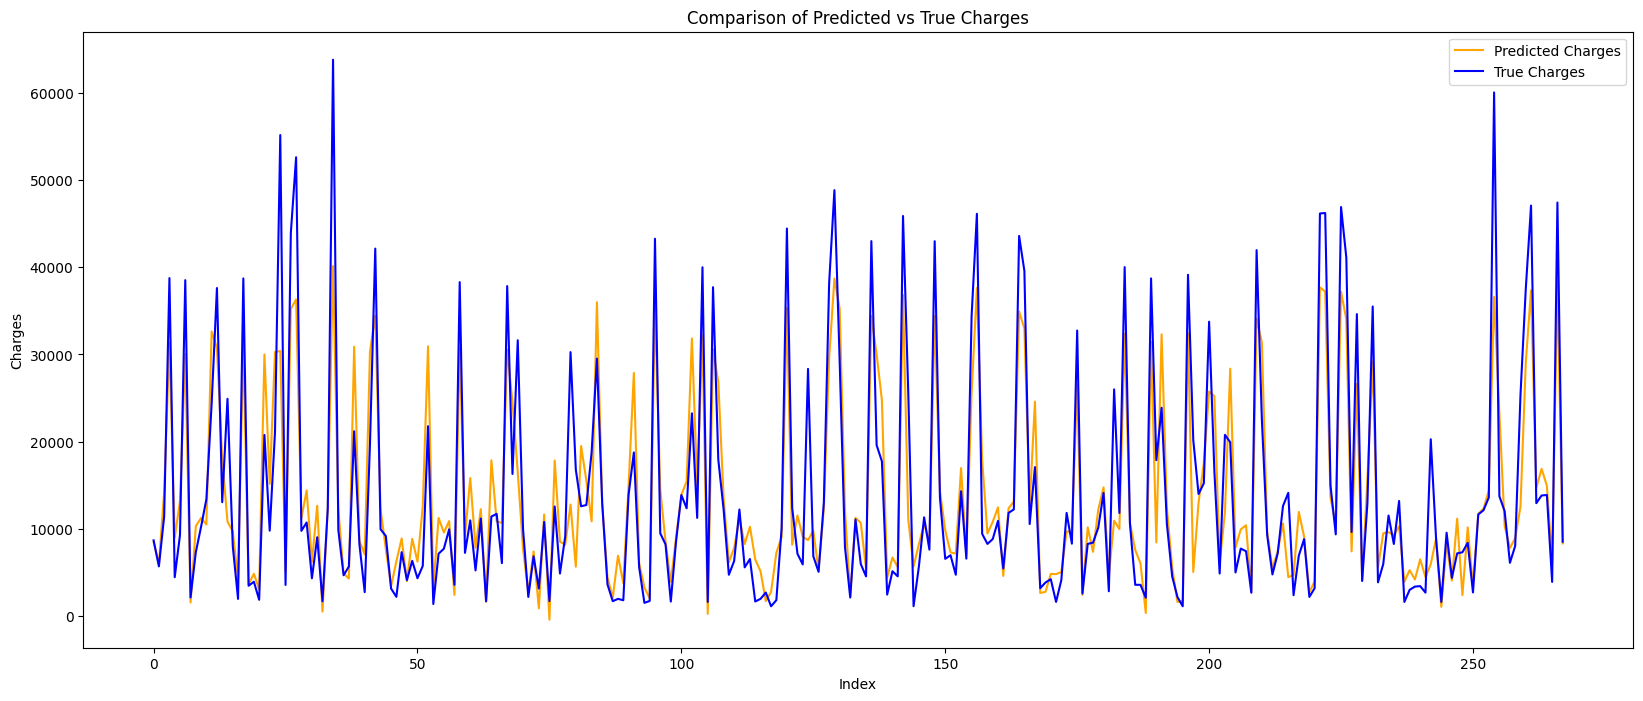

In [286]:
compare_output(y_pred=y_predicted_square_feature, y_true=y_test_numpy)

# 5. Evaluate 

# 7. References

EDA\
https://www.kaggle.com/code/kenjee/titanic-project-example\
https://www.kaggle.com/code/veronikakachmar/medical-insurance-cost-prediction-and-eda\
https://www.kaggle.com/code/alyashoush/medical-insurance-cost-prediction\
https://www.geeksforgeeks.org/machine-learning/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/


Scikit learn\
https://www.tutorialspoint.com/scikit_learn/scikit_learn_linear_regression.htm
https://www.tutorialspoint.com/scikit_learn/scikit_learn_ridge_regression.htm
https://www.tutorialspoint.com/scikit_learn/scikit_learn_lasso.htm

https://www.geeksforgeeks.org/machine-learning/python-implementation-of-polynomial-regression/